## **Emotion Detection in Twitter Posts using Natural Language Processing (NLP)**

**AIML Project**

**Problem Statement:** Implement Emotion Detection in Twitter Posts using NLP.
 

  
    
**PRATIKSHA RALE**
    


**Description:** Natural Language Processing is a form of AI that gives machines the ability to not just read, but to understand and interpret human language. With NLP, machines can make sense of written or spoken text and perform tasks including speech recognition, sentiment analysis, and automatic text summarization. In this project we are detecting the emotions from the Posts of Twitter using Natural Language Processing.

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import neattext.functions as nfx 
import matplotlib.pyplot as plt
import math
import string
from wordcloud import WordCloud
from sklearn.model_selection import GridSearchCV
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as metrics
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, precision_recall_curve
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kshitija\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kshitija\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kshitija\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Dataset**

In [ ]:
df = pd.read_csv(r"C:\Users\Kshitija\Downloads\df_emotions.csv")
df = df.drop('Unnamed: 0',axis=1)
df = df.rename(columns={'text':'Text','label':'Emotions'})
labels_dict = {0:'Sad', 1:'Happy', 2:'Love', 3:'Anger', 4:'Fear', 5:'Surprise'}
df['Emotions'] = df['Emotions'].map(labels_dict )
df

Text Emotions
0      im feeling rather rotten so im not very ambiti...      Sad
1              im updating my blog because i feel shitty      Sad
2      i never make her separate from me because i do...      Sad
3      i left with my bouquet of red and yellow tulip...    Happy
4        i was feeling a little vain when i did this one      Sad
...                                                  ...      ...
19995  im having ssa examination tomorrow in the morn...      Sad
19996  i constantly worry about their fight against n...    Happy
19997  i feel its important to share this info for th...    Happy
19998  i truly feel that if you are passionate enough...    Happy
19999  i feel like i just wanna buy any cute make up ...    Happy

[20000 rows x 2 columns]

**Statistical summary or descriptive statistics of dataset**

In [ ]:
df.head(10) #returns the first 10 rows of the dataset

Text Emotions
0  im feeling rather rotten so im not very ambiti...      Sad
1          im updating my blog because i feel shitty      Sad
2  i never make her separate from me because i do...      Sad
3  i left with my bouquet of red and yellow tulip...    Happy
4    i was feeling a little vain when i did this one      Sad
5  i cant walk into a shop anywhere where i do no...     Fear
6   i felt anger when at the end of a telephone call    Anger
7  i explain why i clung to a relationship with a...    Happy
8  i like to have the same breathless feeling as ...    Happy
9  i jest i feel grumpy tired and pre menstrual w...    Anger

In [ ]:
df.tail(10) #returns the last 10 rows of the dataset

Text  Emotions
19990  i just feel too overwhelmed i can t see the fo...      Fear
19991  i cant help but feel sentimental about the fac...       Sad
19992  i feel i should make is how surprised but ente...  Surprise
19993                           i feel so tortured by it     Anger
19994  i feel a bit rude leaving you hanging there fr...     Anger
19995  im having ssa examination tomorrow in the morn...       Sad
19996  i constantly worry about their fight against n...     Happy
19997  i feel its important to share this info for th...     Happy
19998  i truly feel that if you are passionate enough...     Happy
19999  i feel like i just wanna buy any cute make up ...     Happy

In [ ]:
df.shape #returns the dimensions of the dataframe

(20000, 2)

In [ ]:
df.describe() #returns count, mean, std, etc for each column

Text Emotions
count                                               20000    20000
unique                                              19948        6
top     i write these words i feel sweet baby kicks fr...    Happy
freq                                                    2     6761

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      20000 non-null  object
 1   Emotions  20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [ ]:
df.isnull().sum()

Text        0
Emotions    0
dtype: int64

In [ ]:
df.Emotions.unique()

array(['Sad', 'Happy', 'Fear', 'Anger', 'Love', 'Surprise'], dtype=object)

Happy       6761
Sad         5797
Anger       2709
Fear        2373
Love        1641
Surprise     719
Name: Emotions, dtype: int64

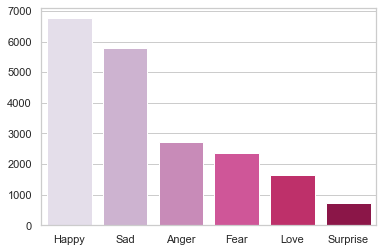

In [ ]:
count_values = df['Emotions'].value_counts()
sns.set(style="whitegrid")
sns.barplot(count_values.index,count_values.values, palette='PuRd')
count_values

In [ ]:
df = df.drop_duplicates(keep="first") # Drop duplicated data and reindex the data
df_reidx = df.reset_index(drop=True)
df.shape

(19999, 2)

Happy       6760
Sad         5797
Anger       2709
Fear        2373
Love        1641
Surprise     719
Name: Emotions, dtype: int64

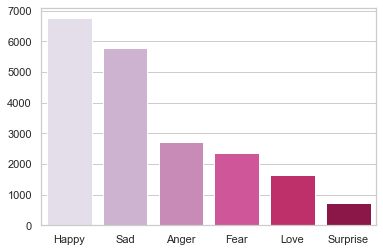

In [ ]:
count_values = df['Emotions'].value_counts()
sns.set(style="whitegrid")
sns.barplot(count_values.index,count_values.values, palette='PuRd')
count_values

In [ ]:
fig = px.bar(x=count_values.index,y=count_values.values)
fig.show()

In [ ]:
df_reidx['length'] = df_reidx['Text'].apply(len) # number of characters
df_reidx['length'].describe() # info()

count    19999.000000
mean        96.671784
std         55.778779
min          7.000000
25%         53.000000
50%         86.000000
75%        129.000000
max        300.000000
Name: length, dtype: float64

In [ ]:
df_reidx.head(10)

Text Emotions  length
0  im feeling rather rotten so im not very ambiti...      Sad      59
1          im updating my blog because i feel shitty      Sad      41
2  i never make her separate from me because i do...      Sad      97
3  i left with my bouquet of red and yellow tulip...    Happy     113
4    i was feeling a little vain when i did this one      Sad      47
5  i cant walk into a shop anywhere where i do no...     Fear      66
6   i felt anger when at the end of a telephone call    Anger      48
7  i explain why i clung to a relationship with a...    Happy     222
8  i like to have the same breathless feeling as ...    Happy      89
9  i jest i feel grumpy tired and pre menstrual w...    Anger     159

**Data Exploration and Visualisation**

In [ ]:
def words_cloud(wordcloud, df):
    plt.figure(figsize=(10, 10))
    plt.title(df+' Word Cloud', size = 16)
    plt.imshow(wordcloud) 
    plt.axis("off");

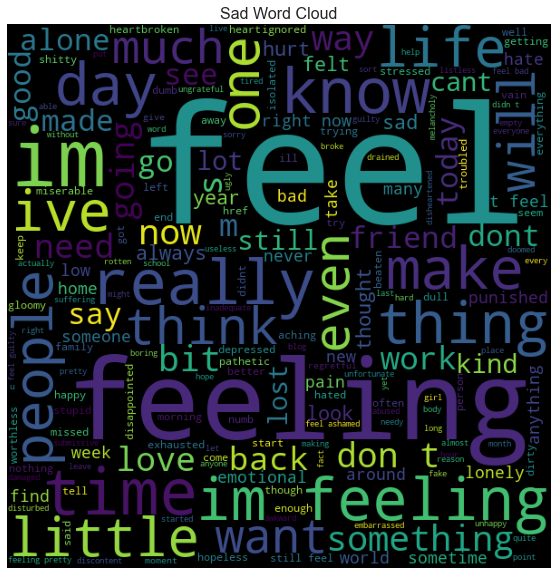

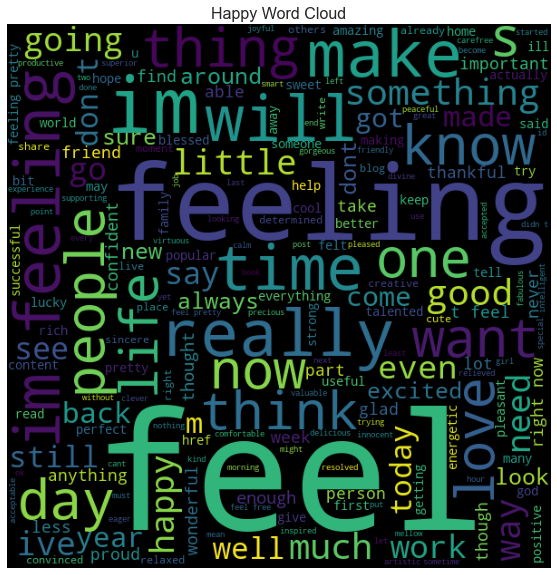

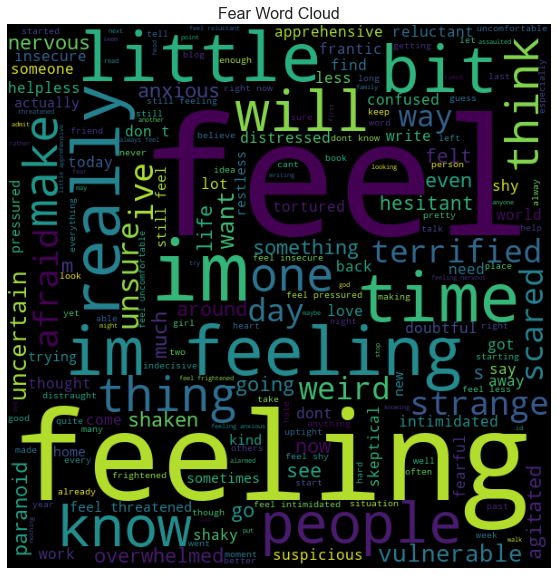

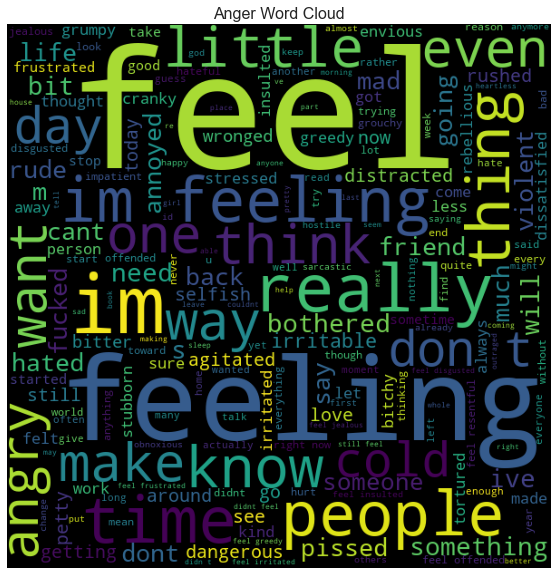

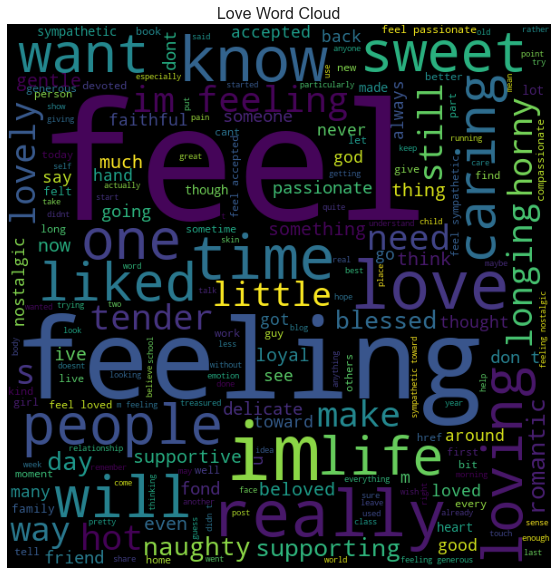

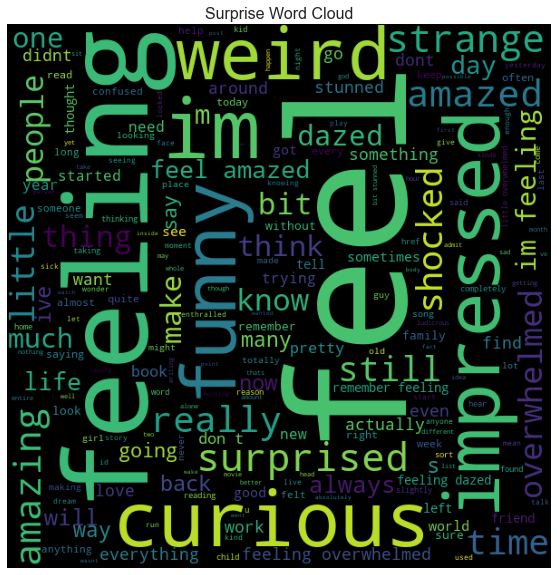

In [ ]:
emotions_list = df['Emotions'].unique()

for emotion in emotions_list:
    text = ' '.join([sentence for sentence in df.loc[df['Emotions'] == emotion,'Text']])
    wordcloud = WordCloud(width = 600, height = 600).generate(text)
    words_cloud(wordcloud, emotion)

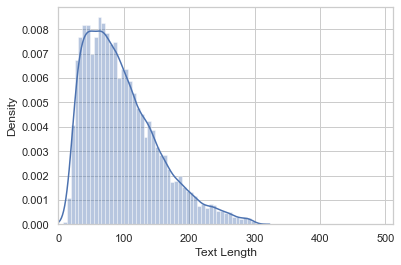

In [ ]:
sns.distplot(df_reidx['length'])
plt.xlim([0, 512]);
plt.xlabel('Text Length');

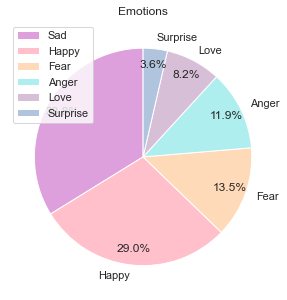

In [ ]:
colors = ['plum', 'pink', 'peachpuff','paleturquoise','thistle','lightsteelblue']
# explode = (0.05,0.05)
plt.figure(figsize=(5, 5))
plt.pie(df['Emotions'].value_counts(), colors=colors, labels=emotions_list, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.legend()
plt.title("Emotions")
plt.show()

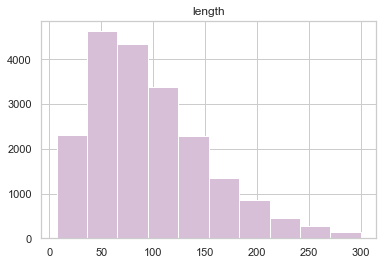

In [ ]:
df_reidx.hist(color='thistle') #to draw histogram
plt.show()

**Text Proprocessing**

1. Decontracted
2. Data cleaning
3. Spell check
4. Stop Words Removal
5. Tokenization
6. POS Tagging
7. Stemming
8. Lemmatization

Decontraction: Contractions are words or combinations of words that are shortened by dropping letters and replacing them by an apostrophe. Decontracting the contracted words.

DataCleaning: Removing html, xml tags, punctautions, urls, etc.

In [ ]:
from tqdm import tqdm
import re
from bs4 import BeautifulSoup
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

def decontracted(phrase):
    # specific
    phrase = re.sub(r"wont", "will not", phrase)
    phrase = re.sub(r"wouldnt", "would not", phrase)
    phrase = re.sub(r"shouldnt", "should not", phrase)
    phrase = re.sub(r"couldnt", "could not", phrase)
    phrase = re.sub(r"cudnt", "could not", phrase)
    phrase = re.sub(r"cant", "can not", phrase)
    phrase = re.sub(r"dont", "do not", phrase)
    phrase = re.sub(r"doesnt", "does not", phrase)
    phrase = re.sub(r"didnt", "did not", phrase)
    phrase = re.sub(r"wasnt", "was not", phrase)
    phrase = re.sub(r"werent", "were not", phrase)
    phrase = re.sub(r"havent", "have not", phrase)
    phrase = re.sub(r"hadnt", "had not", phrase)

    # general
    phrase = re.sub(r"n\ t", " not", phrase)
    phrase = re.sub(r"\re", " are", phrase)
    phrase = re.sub(r"\ s ", " is ", phrase)  
    phrase = re.sub(r"\ d ", " would ", phrase)
    phrase = re.sub(r"\ ll ", " will ", phrase)
    phrase = re.sub(r"\dunno", "do not ", phrase)
    phrase = re.sub(r"ive ", "i have ", phrase)
    phrase = re.sub(r"im ", "i am ", phrase)
    phrase = re.sub(r"i m ", "i am ", phrase)
    phrase = re.sub(r" w ", " with ", phrase)
    
    return phrase

    
def clean_text(df):
    
    cleaned_review = []

    for review_text in tqdm(df['Text']):
        
        # expand the contracted words
        review_text = decontracted(review_text)
        #remove html tags
        review_text = BeautifulSoup(review_text, 'lxml').get_text().strip() # re.sub(r'<.*?>', '', text)
        
        #remove non-alphabetic characters
        review_text = re.sub("[^a-zA-Z]"," ", review_text)
    
        #remove url 
        review_text = re.sub(r'https?://\S+|www\.\S+', '', review_text)
        
        #Removing punctutation, string.punctuation in python consists of !"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~`
        review_text = review_text.translate(str.maketrans('', '', string.punctuation))
        # ''.join([char for char in movie_text_data if char not in string.punctuation])
        
        # remove emails
        review_text = re.sub(r"(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)", '', review_text)
    
        cleaned_review.append(review_text)

    return cleaned_review  

df_reidx['Cleaned_Text'] = clean_text(df_reidx)
df_reidx.head(10)  

100%|██████████████████████████████████████████████████████████████████████████| 19999/19999 [00:07<00:00, 2759.31it/s]


Text Emotions  length  \
0  im feeling rather rotten so im not very ambiti...      Sad      59   
1          im updating my blog because i feel shitty      Sad      41   
2  i never make her separate from me because i do...      Sad      97   
3  i left with my bouquet of red and yellow tulip...    Happy     113   
4    i was feeling a little vain when i did this one      Sad      47   
5  i cant walk into a shop anywhere where i do no...     Fear      66   
6   i felt anger when at the end of a telephone call    Anger      48   
7  i explain why i clung to a relationship with a...    Happy     222   
8  i like to have the same breathless feeling as ...    Happy      89   
9  i jest i feel grumpy tired and pre menstrual w...    Anger     159   

                                        Cleaned_Text  
0  i am feeling rather rotten so i am not very am...  
1        i am updating my blog because i feel shitty  
2  i never make her separate from me because i do...  
3  i left with my bouquet of red and yellow tulip...  
4    i was feeling a little vain when i did this one  
5  i can not walk into a shop anywhere where i do...  
6   i felt anger when at the end of a telephone call  
7  i explain why i clung to a relationship with a...  
8  i like to have the same breathless feeling as ...  
9  i jest i feel grumpy tired and pre menstrual w...

**Tokenization:** Splitting sentences into words(tokens).

In [ ]:
from nltk import word_tokenize, pos_tag
nltk.download('averaged_perceptron_tagger')

def tokenize(phrase):
    tokens_list = []
    tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')
    
    for review_text in tqdm(phrase):
        tokens1 = word_tokenize(review_text)
        tokens1 = [word for word in tokens1]
        tokens_list.append(tokens1)
    return tokens_list

df_reidx2 = df.reset_index(drop=True)
df_reidx2['length'] = df_reidx['Text'].apply(len) # number of characters
df_reidx2['length'].describe() # info()
df_reidx2['Cleaned_Text'] = tokenize(df_reidx['Cleaned_Text'])
token_list = tokenize(df_reidx['Cleaned_Text'])
df_reidx2.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Kshitija\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
100%|██████████████████████████████████████████████████████████████████████████| 19999/19999 [00:03<00:00, 6313.78it/s]


Text Emotions  length  \
0  im feeling rather rotten so im not very ambiti...      Sad      59   
1          im updating my blog because i feel shitty      Sad      41   
2  i never make her separate from me because i do...      Sad      97   
3  i left with my bouquet of red and yellow tulip...    Happy     113   
4    i was feeling a little vain when i did this one      Sad      47   

                                        Cleaned_Text  
0  [i, am, feeling, rather, rotten, so, i, am, no...  
1  [i, am, updating, my, blog, because, i, feel, ...  
2  [i, never, make, her, separate, from, me, beca...  
3  [i, left, with, my, bouquet, of, red, and, yel...  
4  [i, was, feeling, a, little, vain, when, i, di...

**Remove Stopwords:** Words like a,am,the,is,and,or, etc. will be removed.

In [ ]:
def remove_stopwords(phrase):
    remove_sw = []
    tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')
    stop_words = stopwords.words('english')
    
    for review_text in tqdm(phrase):
        tokens = word_tokenize(review_text)
        tokens = [word for word in tokens if not word in stop_words]
        remove_sw.append(tokens)
    return remove_sw

df_reidx['Cleaned_Text'] = remove_stopwords(df_reidx['Cleaned_Text'])
df_reidx.head()

100%|██████████████████████████████████████████████████████████████████████████| 19999/19999 [00:04<00:00, 4944.60it/s]


Text Emotions  length  \
0  im feeling rather rotten so im not very ambiti...      Sad      59   
1          im updating my blog because i feel shitty      Sad      41   
2  i never make her separate from me because i do...      Sad      97   
3  i left with my bouquet of red and yellow tulip...    Happy     113   
4    i was feeling a little vain when i did this one      Sad      47   

                                        Cleaned_Text  
0        [feeling, rather, rotten, ambitious, right]  
1                     [updating, blog, feel, shitty]  
2  [never, make, separate, ever, want, feel, like...  
3  [left, bouquet, red, yellow, tulips, arm, feel...  
4                       [feeling, little, vain, one]

**POS Tagging:** Identify the Part of Speech of each tokens

In [ ]:
def Pos_tagging(phrase):
    postags = []
    for i in range(len(df_reidx['Cleaned_Text'])):
        pos_tagger = nltk.pos_tag(token_list[i])
        postags.append(pos_tagger)
        return postags

df_reidx3 = df.reset_index(drop=True)
df_reidx3['length'] = df_reidx['Text'].apply(len) # number of characters
df_reidx3['length'].describe() # info()
res = Pos_tagging(df_reidx['Cleaned_Text'])
res

[[('i', 'NN'),
  ('am', 'VBP'),
  ('feeling', 'VBG'),
  ('rather', 'RB'),
  ('rotten', 'VBN'),
  ('so', 'RB'),
  ('i', 'JJ'),
  ('am', 'VBP'),
  ('not', 'RB'),
  ('very', 'RB'),
  ('ambitious', 'JJ'),
  ('right', 'NN'),
  ('now', 'RB')]]

Now we have the POS tags for every text. There are lots of categories. Here are the meanings:

**NN**: noun (there are other categories that can fit within this one for our purposes, such as NNS, NNP, NNPS, which all belong to nouns, containing plurals and proper names)

**RB**: adverb

**VB**: verb (and similar categories indicating tense: VBP, VBG, VBS..)

**JJ**: adjective or numeral

**Stemming:** Extrating root word by removing the suffixes and prefixes

In [ ]:
from nltk.stem import PorterStemmer

def stemming(phrase):
    stemmer = PorterStemmer()
    stem_output=[]
    stemmed=[]
    for review_text in tqdm(phrase):
        stemmed = [stemmer.stem(word) for word in review_text]
        stem_output.append(stemmed)
    return stem_output

df_reidx1 = df.reset_index(drop=True)
df_reidx1['length'] = df_reidx['Text'].apply(len) # number of characters
df_reidx1['length'].describe() # info()
df_reidx1['Cleaned_Text'] = stemming(df_reidx['Cleaned_Text'])
df_reidx1.head()

100%|██████████████████████████████████████████████████████████████████████████| 19999/19999 [00:04<00:00, 4169.90it/s]


Text Emotions  length  \
0  im feeling rather rotten so im not very ambiti...      Sad      59   
1          im updating my blog because i feel shitty      Sad      41   
2  i never make her separate from me because i do...      Sad      97   
3  i left with my bouquet of red and yellow tulip...    Happy     113   
4    i was feeling a little vain when i did this one      Sad      47   

                                        Cleaned_Text  
0              [feel, rather, rotten, ambiti, right]  
1                        [updat, blog, feel, shitti]  
2  [never, make, separ, ever, want, feel, like, a...  
3  [left, bouquet, red, yellow, tulip, arm, feel,...  
4                           [feel, littl, vain, one]

**Lemmatization:** Extracting root word by refering the dictionary of words.

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

def lemmatizing(phrase):
    lemmatizer = WordNetLemmatizer()
    lemmated_output=[]
    lemmated=[]
    for review_text in tqdm(phrase):
        lemmated = [lemmatizer.lemmatize(word) for word in review_text]
        lemmated_output.append(lemmated)
    return lemmated_output

df_reidx['Cleaned_Text'] = lemmatizing(df_reidx['Cleaned_Text'])
df_reidx.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kshitija\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Kshitija\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
100%|██████████████████████████████████████████████████████████████████████████| 19999/19999 [00:02<00:00, 7270.25it/s]


Text Emotions  length  \
0  im feeling rather rotten so im not very ambiti...      Sad      59   
1          im updating my blog because i feel shitty      Sad      41   
2  i never make her separate from me because i do...      Sad      97   
3  i left with my bouquet of red and yellow tulip...    Happy     113   
4    i was feeling a little vain when i did this one      Sad      47   

                                        Cleaned_Text  
0        [feeling, rather, rotten, ambitious, right]  
1                     [updating, blog, feel, shitty]  
2  [never, make, separate, ever, want, feel, like...  
3  [left, bouquet, red, yellow, tulip, arm, feeli...  
4                       [feeling, little, vain, one]

In [ ]:
def to_sentence(phrase):
    sentence=[]
    for words in tqdm(phrase):
        sentence.append((" ").join(words))
    return sentence
df_reidx['Cleaned_Text']=to_sentence(df_reidx['Cleaned_Text'])
df_reidx.head()

100%|████████████████████████████████████████████████████████████████████████| 19999/19999 [00:00<00:00, 661200.55it/s]


Text Emotions  length  \
0  im feeling rather rotten so im not very ambiti...      Sad      59   
1          im updating my blog because i feel shitty      Sad      41   
2  i never make her separate from me because i do...      Sad      97   
3  i left with my bouquet of red and yellow tulip...    Happy     113   
4    i was feeling a little vain when i did this one      Sad      47   

                                        Cleaned_Text  
0              feeling rather rotten ambitious right  
1                          updating blog feel shitty  
2    never make separate ever want feel like ashamed  
3  left bouquet red yellow tulip arm feeling slig...  
4                            feeling little vain one

In [ ]:
df_reidx

Text Emotions  length  \
0      im feeling rather rotten so im not very ambiti...      Sad      59   
1              im updating my blog because i feel shitty      Sad      41   
2      i never make her separate from me because i do...      Sad      97   
3      i left with my bouquet of red and yellow tulip...    Happy     113   
4        i was feeling a little vain when i did this one      Sad      47   
...                                                  ...      ...     ...   
19994  im having ssa examination tomorrow in the morn...      Sad     191   
19995  i constantly worry about their fight against n...    Happy     173   
19996  i feel its important to share this info for th...    Happy      80   
19997  i truly feel that if you are passionate enough...    Happy     105   
19998  i feel like i just wanna buy any cute make up ...    Happy      74   

                                            Cleaned_Text  
0                  feeling rather rotten ambitious right  
1                              updating blog feel shitty  
2        never make separate ever want feel like ashamed  
3      left bouquet red yellow tulip arm feeling slig...  
4                                feeling little vain one  
...                                                  ...  
19994  ssa examinatio notomorrow nothe morning quite ...  
19995  constantly worry fight nature push limit inner...  
19996         feel important share info experience thing  
19997  truly feel passionate enough something stay tr...  
19998  feel like wan na buy cute make see online eve ...  

[19999 rows x 4 columns]

**Vector Generation**

In [ ]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

vectorizer = CountVectorizer(stop_words='english', max_df=0.5, min_df=3, ngram_range=(1,1),tokenizer = token.tokenize)
x = vectorizer.fit_transform(df_reidx.Cleaned_Text)
y = df_reidx.Emotions.values

print("X.shape : ",x.shape)
print("y.shape : ",y.shape)

train_idx, test_idx = train_test_split(np.arange(df_reidx.shape[0]), test_size=0.3,shuffle=True, random_state=42)

x_train = x[train_idx]
y_train = y[train_idx]

x_test = x[test_idx]
y_test = y[test_idx]
print("Number of training examples:{}".format(len(train_idx)))
print("Number of testing examples:{}\n".format(len(test_idx)))
print("Training data: X_train : {}, y_train : {}".format(x_train.shape, y_train.shape))
print("Testing data: X_test : {}, y_test : {}".format(x_test.shape, y_test.shape))

X.shape :  (19999, 5247)
y.shape :  (19999,)
Number of training examples:13999
Number of testing examples:6000

Training data: X_train : (13999, 5247), y_train : (13999,)
Testing data: X_test : (6000, 5247), y_test : (6000,)


**Logistic Regression:** Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. 

              precision    recall  f1-score   support

       Anger       0.88      0.87      0.87       816
        Fear       0.86      0.83      0.85       718
       Happy       0.89      0.94      0.91      2042
        Love       0.84      0.76      0.80       499
         Sad       0.91      0.92      0.91      1710
    Surprise       0.84      0.73      0.78       215

    accuracy                           0.89      6000
   macro avg       0.87      0.84      0.85      6000
weighted avg       0.89      0.89      0.89      6000


Accuracy for Logistic Regression Model is: 0.887




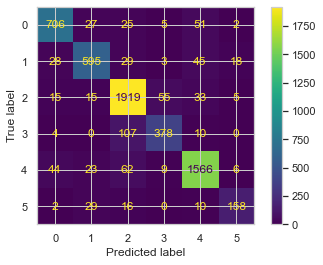

In [ ]:
from sklearn import linear_model
lr_clf =  linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')#LogisticRegression()

lr_clf.fit(x_train, y_train)

y_pred_test_lr = lr_clf.predict(x_test)
y_predprob_lr = lr_clf.predict_proba(x_test)
matrix_lr = confusion_matrix(y_test,y_pred_test_lr, )
print(classification_report(y_test, y_pred_test_lr))
print("\nAccuracy for Logistic Regression Model is:",metrics.accuracy_score(y_test, y_pred_test_lr))
print("\n")

y_predict = lr_clf.predict(x_test)
acc_lr = metrics.accuracy_score(y_test, y_pred_test_lr)
matrix_display = ConfusionMatrixDisplay(matrix_lr).plot()

In [ ]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
    
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
print_score(lr_clf, x_train, y_train, x_test, y_test, train=True)
print_score(lr_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 96.89%
_______________________________________________
CLASSIFICATION REPORT:
                 Anger         Fear        Happy         Love          Sad  \
precision     0.972639     0.959246     0.967661     0.965766     0.974197   
recall        0.957739     0.952870     0.983044     0.938704     0.979202   
f1-score      0.965132     0.956047     0.975292     0.952043     0.976693   
support    1893.000000  1655.000000  4718.000000  1142.000000  4087.000000   

             Surprise  accuracy     macro avg  weighted avg  
precision    0.962500  0.968926      0.967001      0.968907  
recall       0.916667  0.968926      0.954704      0.968926  
f1-score     0.939024  0.968926      0.960705      0.968850  
support    504.000000  0.968926  13999.000000  13999.000000  
_______________________________________________
Confusion Matrix: 
 [[1813   18   18    1   43    0]
 [  16 1577   23    0   27   12]
 [   8    7 4638   32   30    3]
 [   2    1   63 1072   

**Multinomial Naive Bayes:** The Multinomial Naive Bayes algorithm is a Bayesian learning approach popular in Natural Language Processing (NLP).

              precision    recall  f1-score   support

       Anger       0.84      0.79      0.82       816
        Fear       0.79      0.78      0.79       718
       Happy       0.84      0.90      0.87      2042
        Love       0.78      0.60      0.68       499
         Sad       0.84      0.89      0.86      1710
    Surprise       0.74      0.45      0.56       215

    accuracy                           0.83      6000
   macro avg       0.80      0.74      0.76      6000
weighted avg       0.82      0.83      0.82      6000

Accuracy for Multinominal Naive Bayes Model is: 0.8275




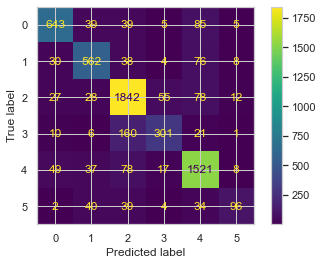

In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

y_pred_test_mnb = mnb.predict(x_test)
y_predprob_mnb = mnb.predict_proba(x_test)
matrix_mnb = confusion_matrix(y_test,y_pred_test_mnb)
print(classification_report(y_test, y_pred_test_mnb))
print("Accuracy for Multinominal Naive Bayes Model is:",metrics.accuracy_score(y_test, y_pred_test_mnb))
print("\n")
acc_mnb = metrics.accuracy_score(y_test, y_pred_test_mnb)
matrix_display = ConfusionMatrixDisplay(matrix_mnb).plot()

In [ ]:
print_score(mnb, x_train, y_train, x_test, y_test, train=True)
print_score(mnb, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 93.19%
_______________________________________________
CLASSIFICATION REPORT:
                 Anger         Fear        Happy         Love          Sad  \
precision     0.952980     0.918478     0.926770     0.940524     0.928004   
recall        0.920761     0.919033     0.965663     0.816988     0.971373   
f1-score      0.936593     0.918756     0.945817     0.874414     0.949193   
support    1893.000000  1655.000000  4718.000000  1142.000000  4087.000000   

             Surprise  accuracy     macro avg  weighted avg  
precision    0.981707  0.931852      0.941411      0.932794  
recall       0.638889  0.931852      0.872118      0.931852  
f1-score     0.774038  0.931852      0.899802      0.930347  
support    504.000000  0.931852  13999.000000  13999.000000  
_______________________________________________
Confusion Matrix: 
 [[1743   30   33    2   85    0]
 [  29 1521   28    1   74    2]
 [  20   13 4556   47   78    4]
 [   5    3  171  933   

**Support Vector Machine:** Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

              precision    recall  f1-score   support

       Anger       0.87      0.87      0.87       816
        Fear       0.86      0.85      0.85       718
       Happy       0.90      0.92      0.91      2042
        Love       0.78      0.77      0.77       499
         Sad       0.92      0.91      0.91      1710
    Surprise       0.79      0.78      0.78       215

    accuracy                           0.88      6000
   macro avg       0.85      0.85      0.85      6000
weighted avg       0.88      0.88      0.88      6000


Accuracy for Support Vector Machine Model is: 0.8821666666666667




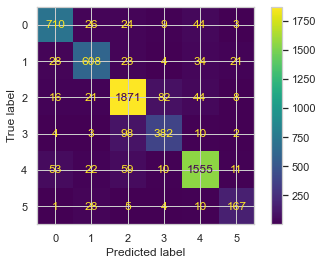

In [ ]:
from sklearn.svm import LinearSVC
model_svc = LinearSVC(loss='hinge', dual=True)

model_svc.fit(x_train, y_train)
y_pred_test_sv = model_svc.predict(x_test)
matrix_sv = confusion_matrix(y_test,y_pred_test_sv)
print(classification_report(y_test, y_pred_test_sv))
print("\nAccuracy for Support Vector Machine Model is:",metrics.accuracy_score(y_test, y_pred_test_sv))
print("\n")
acc_svm = metrics.accuracy_score(y_test, y_pred_test_sv)
matrix_display = ConfusionMatrixDisplay(matrix_sv).plot()

In [ ]:
print_score(model_svc, x_train, y_train, x_test, y_test, train=True)
print_score(model_svc, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 97.93%
_______________________________________________
CLASSIFICATION REPORT:
                 Anger         Fear        Happy         Love          Sad  \
precision     0.979211     0.968825     0.981247     0.972591     0.983590   
recall        0.970417     0.976435     0.987071     0.963222     0.982628   
f1-score      0.974794     0.972615     0.984150     0.967884     0.983109   
support    1893.000000  1655.000000  4718.000000  1142.000000  4087.000000   

             Surprise  accuracy     macro avg  weighted avg  
precision    0.975758  0.979284      0.976870      0.979284  
recall       0.958333  0.979284      0.973018      0.979284  
f1-score     0.966967  0.979284      0.974920      0.979272  
support    504.000000  0.979284  13999.000000  13999.000000  
_______________________________________________
Confusion Matrix: 
 [[1837   15    7    1   33    0]
 [  11 1616    8    0   13    7]
 [   4    5 4657   28   19    5]
 [   1    1   39 1100   

**Decision Tree:** Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. 

              precision    recall  f1-score   support

       Anger       0.80      0.88      0.84       816
        Fear       0.83      0.83      0.83       718
       Happy       0.90      0.83      0.86      2042
        Love       0.77      0.79      0.78       499
         Sad       0.87      0.89      0.88      1710
    Surprise       0.75      0.80      0.77       215

    accuracy                           0.85      6000
   macro avg       0.82      0.84      0.83      6000
weighted avg       0.85      0.85      0.85      6000


Accuracy for Decision Tree Model is: 0.8513333333333334




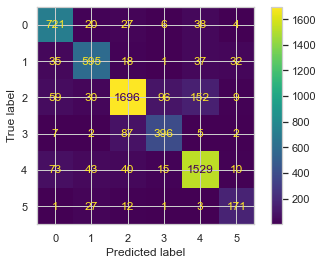

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_DT = DecisionTreeClassifier()
clf_DT.fit(x_train, y_train)

y_pred_test_dt = clf_DT.predict(x_test)
matrix_dt = confusion_matrix(y_test,y_pred_test_dt)
print(classification_report(y_test, y_pred_test_dt))
print("\nAccuracy for Decision Tree Model is:",metrics.accuracy_score(y_test, y_pred_test_dt))
print("\n")
acc_dt = metrics.accuracy_score(y_test, y_pred_test_dt)
matrix_display = ConfusionMatrixDisplay(matrix_dt).plot()

In [ ]:
print_score(clf_DT, x_train, y_train, x_test, y_test, train=True)
print_score(clf_DT, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 99.71%
_______________________________________________
CLASSIFICATION REPORT:
                 Anger         Fear        Happy         Love          Sad  \
precision     0.995792     0.995773     0.995358     1.000000     0.999510   
recall        1.000000     0.996375     0.999788     0.986865     0.997553   
f1-score      0.997891     0.996074     0.997568     0.993389     0.998530   
support    1893.000000  1655.000000  4718.000000  1142.000000  4087.000000   

             Surprise  accuracy     macro avg  weighted avg  
precision    0.997988  0.997143      0.997403      0.997151  
recall       0.984127  0.997143      0.994118      0.997143  
f1-score     0.991009  0.997143      0.995744      0.997139  
support    504.000000  0.997143  13999.000000  13999.000000  
_______________________________________________
Confusion Matrix: 
 [[1893    0    0    0    0    0]
 [   3 1649    1    0    1    1]
 [   0    0 4717    0    1    0]
 [   0    0   15 1127   

**Randon Forest:** Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

              precision    recall  f1-score   support

       Anger       0.85      0.90      0.87       816
        Fear       0.86      0.83      0.85       718
       Happy       0.91      0.90      0.90      2042
        Love       0.80      0.79      0.79       499
         Sad       0.91      0.91      0.91      1710
    Surprise       0.76      0.80      0.78       215

    accuracy                           0.88      6000
   macro avg       0.85      0.85      0.85      6000
weighted avg       0.88      0.88      0.88      6000


Accuracy for Random Forest Model is: 0.8513333333333334




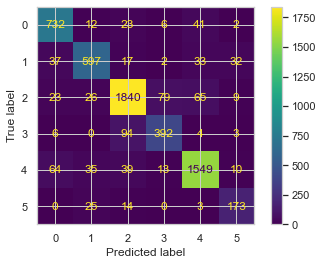

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier(n_estimators=200)
clf_RF.fit(x_train, y_train)

y_pred_test_re = clf_RF.predict(x_test)
matrix_re = confusion_matrix(y_test,y_pred_test_re)
print(classification_report(y_test, y_pred_test_re))
print("\nAccuracy for Random Forest Model is:",metrics.accuracy_score(y_test, y_pred_test_dt))
print("\n")
acc_rf = metrics.accuracy_score(y_test, y_pred_test_re)
matrix_display = ConfusionMatrixDisplay(matrix_re).plot()

In [ ]:
print_score(clf_RF, x_train, y_train, x_test, y_test, train=True)
print_score(clf_RF, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 99.71%
_______________________________________________
CLASSIFICATION REPORT:
                 Anger         Fear        Happy         Love          Sad  \
precision     0.997887     0.998180     0.995986     0.998232     0.998532   
recall        0.997887     0.993958     0.999152     0.988616     0.998532   
f1-score      0.997887     0.996064     0.997566     0.993401     0.998532   
support    1893.000000  1655.000000  4718.000000  1142.000000  4087.000000   

             Surprise  accuracy     macro avg  weighted avg  
precision    0.988166  0.997143      0.996164      0.997147  
recall       0.994048  0.997143      0.995365      0.997143  
f1-score     0.991098  0.997143      0.995758      0.997141  
support    504.000000  0.997143  13999.000000  13999.000000  
_______________________________________________
Confusion Matrix: 
 [[1889    1    0    0    3    0]
 [   2 1645    1    0    2    5]
 [   0    0 4714    2    1    1]
 [   0    0   13 1129   

**Model Evaluation**

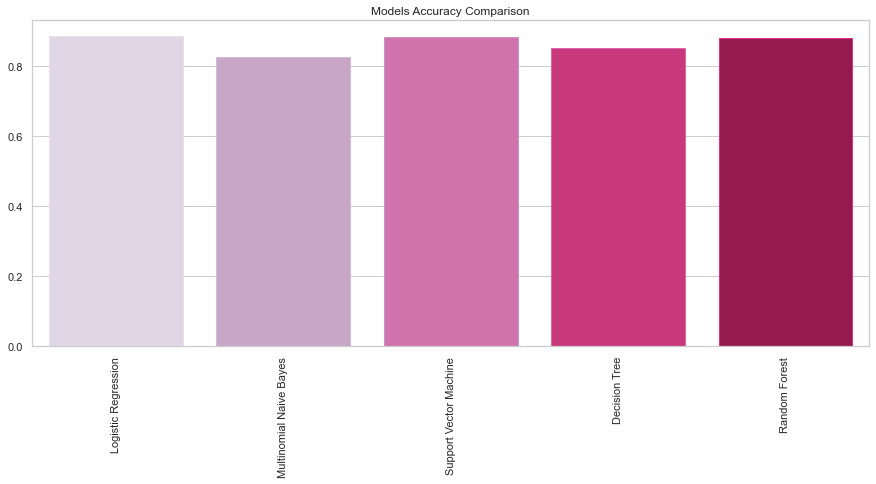

In [ ]:
MLA_Name = ['Logistic Regression', 'Multinomial Naive Bayes', 'Support Vector Machine', 'Decision Tree','Random Forest']
MLA_Train_Accuracy = [acc_lr, acc_mnb, acc_svm, acc_dt, acc_rf]
plt.subplots(figsize=(15,6))
sns.barplot(x=MLA_Name, y=MLA_Train_Accuracy,palette='PuRd',edgecolor=sns.color_palette('PuRd',7))
plt.xticks(rotation=90)
plt.title('Models Accuracy Comparison')
plt.show()

**Model Accuracy Comparison**

<table>
  <tr>
    <th>ML Model</th>
    <th>Accuracy</th>
  </tr>
  <tr>
    <td>Logistic Regression</td>
    <td>88.7%</td>
  </tr>
    <td>Multinomial Naive Bayes</td>
    <td>82.75</td>
  </tr>
  <tr>
    <td>Support Vector Machine</td>
    <td>88.22</td>
  </tr>
  <tr>
    <td>Decision Tree</td>
    <td>84.9</td>
  </tr>
  <tr>
    <td>Random Forest</td>
    <td>87.92%</td>
  </tr>
</table>



**Logistic Regression is having the highest accuracy that is 88.7% hence it is the most optimal ML Algorithm for Emotion Detection in Test using NLP.**

**Hyperparameter Tuning using GridSearchCV for Logistic Regression**

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg_cv = GridSearchCV(lr_clf,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print('best paremeters for logistic regression: ', logreg_cv.best_params_)
print('best score for logistic regression after grid search cv:', logreg_cv.best_score_)
acc_logreg = logreg_cv.best_score_

best paremeters for logistic regression:  {'C': 1.0, 'penalty': 'l1'}
best score for logistic regression after grid search cv: 0.8975637700398245


In [ ]:
fig = px.bar(x=MLA_Name, y=MLA_Train_Accuracy)
fig.show()

**Emotion Detection:** String/Text is taken as input and the Emotion of the Text will be displayed.

In [ ]:
inp = 'Y'
while(inp != 'N'):
    ip = input('\nEnter a Text: ')
    test_result = logreg_cv.predict(vectorizer.transform([ip]))
    if(test_result[0] == 'Happy'):
        print("\nEmotion: Happy\U0001F600")
    if(test_result[0] == 'Sad'):
        print("\nEmotion: Sad\N{loudly crying face}")
    if(test_result[0] == 'Anger'):
        print("\nEmotion: Anger\N{angry face}")
    if(test_result[0] == 'Fear'):
        print("\nEmotion: Fear\N{face screaming in fear}")
    if(test_result[0] == 'Surprise'):
        print("\nEmotion: Surprise\N{astonished face}")
    if(test_result[0] == 'Love'):
        print("\nEmotion: Love\U0001F970")
    inp = input("\nDo you want to continue? (Y/N): ")


Enter a Text: I feel good today

Emotion: Happy😀

Do you want to continue? (Y/N): Y

Enter a Text: I am irritated

Emotion: Anger😠

Do you want to continue? (Y/N): Y

Enter a Text: You are so caring

Emotion: Love🥰

Do you want to continue? (Y/N): Y

Enter a Text: I am terrified of reptiles

Emotion: Fear😱

Do you want to continue? (Y/N): Y

Enter a Text: Your words hurt me

Emotion: Sad😭

Do you want to continue? (Y/N): Y

Enter a Text: Amazed!

Emotion: Surprise😲

Do you want to continue? (Y/N): N
